In [2]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt 
import altair as alt


# Analisis Exploratorio sobre accidentalidad en Buenos Aires

En este informe analizaremos la accidentalidad de Buenos aires, argentina, para esto analizaremos una base de datos con información sobre 696 accidentes ocurridos en La Ciudad Autónoma de Buenos Aires (CABA), de los cuales se cuenta con 717 victimas fatales en estos accidentes.  

CABA cuenta con  una población aproximada de  $2.890.151$, dividida en $15$ comunas, de la cuales cada comuna tiene entre $1$ a $5$ barrios cada una. Ademas las vias se dividen en **'AVENIDA'**, **'GRAL PAZ'**, **'CALLE'** y  **'AUTOPISTA'**

- En la mayoria de los casos tenemos información sobre la edad, sexo y fecha de fallecimiento de la victima y fecha del accidente.

- El objetivo es brindar información oportuna y significativa que servirá para reduccir la accidentalidad.

## Carga de data

In [3]:
path_hechos = os.path.join('..','data','clear','hechos_homicidios.csv')
path_victimas = os.path.join('..','data','clear','victimas_homicidios.csv')

In [4]:
hechos = pd.read_csv(path_hechos)
victimas = pd.read_csv(path_victimas)

In [5]:
hechos.head(5)

,id_hechos,n_victimas,fecha,anho,mes,dia,hora,franja_horaria,lugar_del_hecho,tipo_de_calle,calle,direccion_normalizada,comuna,longitud,latitud,participantes,victimas,acusado,Cruce_boolean
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,True
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,True
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,False
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO-SD,MOTO,SD,True
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,True


In [6]:
victimas.head(5)

,id_hechos,fecha,anho,mes,dia,rol,victimas,sexo,edad,fecha_fallecimiento,misma_fecha_accidente,rango_etario,semestre
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01,True,joven,1
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02,True,adulto_mayor,1
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03,True,adulto,1
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,2016-01-10,True,joven,1
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01,False,joven,1


In [7]:
data = hechos.merge(victimas,on='id_hechos')

data.columns

Index(['id_hechos', 'n_victimas', 'fecha_x', 'anho_x', 'mes_x', 'dia_x',
       'hora', 'franja_horaria', 'lugar_del_hecho', 'tipo_de_calle', 'calle',
       'direccion_normalizada', 'comuna', 'longitud', 'latitud',
       'participantes', 'victimas_x', 'acusado', 'Cruce_boolean', 'fecha_y',
       'anho_y', 'mes_y', 'dia_y', 'rol', 'victimas_y', 'sexo', 'edad',
       'fecha_fallecimiento', 'misma_fecha_accidente', 'rango_etario',
       'semestre'],
      dtype='object')

In [8]:
columnas = ['id_hechos', 'n_victimas', 'fecha_x', 'anho_x', 'mes_x', 'dia_x',
       'hora', 'franja_horaria', 'lugar_del_hecho', 'tipo_de_calle', 'calle',
       'direccion_normalizada', 'comuna', 'longitud', 'latitud',
       'participantes', 'victimas_x', 'acusado', 'Cruce_boolean', 'rol', 'sexo', 'edad',
       'fecha_fallecimiento', 'misma_fecha_accidente', 'rango_etario',
       'semestre']

In [9]:
data = data[columnas]

## Cantidad de accidente en cruces por tipo de calle

A continuación analizaremos la cantidad de de victimas que ocurrieron en un cruce. ademas vamos a analizar el tipo de calle en que ocurrio el accidente.

In [168]:
data['Cruce_boolean'].value_counts().reset_index().rename(columns={'Cruce_boolean': 'accidente en un cruce','count': 'cantidad de en cruces'})

,accidente en un cruce,cantidad de en cruces
0,True,541
1,False,176


**Nota:** Podemos observar que de las 717 victimas 541 ocurrieron en un cruce vehicular, esto equivale al $75\%$ de los accidentes ocurridos.

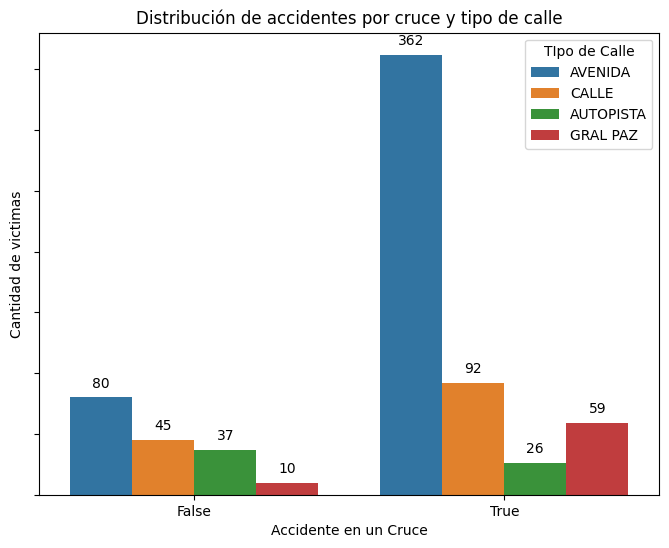

In [171]:
plt.figure(figsize=(8, 6))

mask_sin_SD = data['sexo'] != 'SD'
ax = sns.countplot(x='Cruce_boolean', data=data[mask_sin_SD] ,hue='tipo_de_calle')

for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_yticklabels([])
ax.legend(title ='TIpo de Calle')

plt.title('Distribución de accidentes por cruce y tipo de calle')
plt.xlabel('Accidente en un Cruce')
plt.ylabel('Cantidad de victimas')
plt.show()

**Conclusión**: Segun las graficas obtenidad el $75\%$ de los accidentes ocurrieron en cruces vehiculares, y de los $362$ ocurrieron en Avenidas, por lo que el 67% de los accidentes ocurridos en cruces son causados en avenidas, a continuación analizaremos que tipo de victimas son las que más accidentalidad tienen en este tipo de calle.

In [163]:
pd.DataFrame(data['sexo'].value_counts().reset_index().rename(columns={'count': 'cantidad de victimas'}))

,sexo,cantidad de victimas
0,MASCULINO,545
1,FEMENINO,166
2,SD,6


In [162]:
data['victimas_x'][data['tipo_de_calle'] =='AVENIDA'].value_counts().reset_index().rename(columns={'count': 'cantidad de victimas en avenidas'})

,victimas_x,cantidad de victimas en avenidas
0,PEATON,186
1,MOTO,174
2,AUTO,53
3,BICICLETA,18
4,PASAJEROS,4
5,MOVIL,3
6,SD,2
7,CARGAS,2


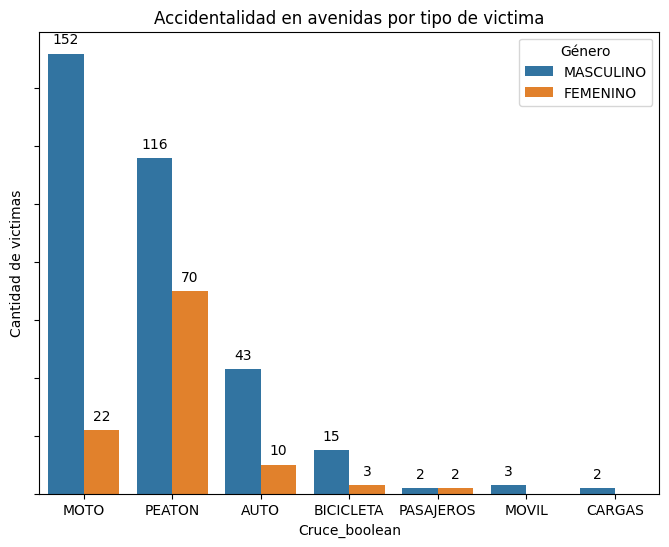

In [150]:
plt.figure(figsize=(8, 6))

mask_avenida = (data['tipo_de_calle'] =='AVENIDA') & (data['victimas_x'] !='SD')
ax = sns.countplot(x='victimas_x', data=data[mask_avenida] ,hue='sexo')

for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_yticklabels([])
ax.legend(title ='Género')

plt.title('Accidentalidad en avenidas por tipo de victima')
plt.xlabel('Cruce_boolean')
plt.ylabel('Cantidad de victimas')
plt.show()

- **Conclusión:** 
Podemos observar que contamos con 442 accidentes ocurridos en avenidas donde las victimas mas afectadas son MOTOS y PEATONES, mas aun, los hombres en moto son los mas afectados y representan el $34\%$  y las mujeres peatones con un $16\%$ 

## Relación entre rango etario y fecha de accidente
El tiempo de reacción ante un accidente es fundamental para evitar victimas fatales, es por esto que analizaremos la cantida de victimas que pierden su vida el mismo dia del accidente, ademas realizaremos un análisis por rango etareo, donde su distribución es 

$$\begin{cases}
Menor && \text{si es menor 18 años}\\
Joven && \text{si es menor 30 años y mayor de 17 años}\\
Adulto && \text{si es menor 50 años y mayor de 29 años}\\
Adulto mayor && \text{si es mayor igual que 50 años}
\end{cases}$$


In [181]:
data['rango_etario'].value_counts().reset_index().rename(columns={'count':'cantidad de victimas','rango_etario': 'rango etario'})

,rango etario,cantidad de victimas
0,adulto,286
1,adulto_mayor,210
2,joven,198
3,menor,23


In [184]:
columnas = ['rango_etario','misma_fecha_accidente']

data[columnas].groupby(columnas).value_counts().reset_index().sort_values('count',ascending=False)

,rango_etario,misma_fecha_accidente,count
1,adulto,True,240
5,joven,True,165
3,adulto_mayor,True,141
2,adulto_mayor,False,69
0,adulto,False,46
4,joven,False,33
7,menor,True,21
6,menor,False,2


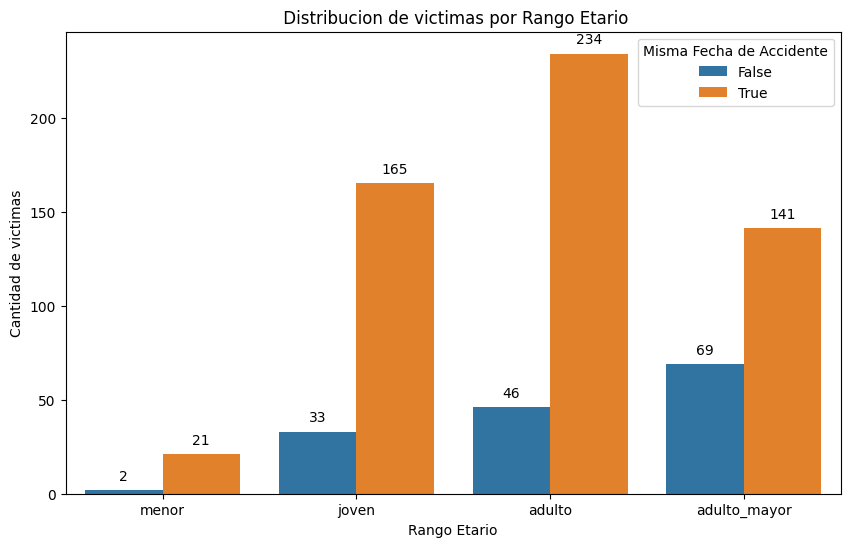

In [214]:

columnas = ['rango_etario', 'misma_fecha_accidente']
mask_sin_SD = data['sexo'] != 'SD'

plt.figure(figsize=(10, 6))

orden_categorias = ["menor", "joven", "adulto", "adulto_mayor"]
ax = sns.countplot(x='rango_etario', hue='misma_fecha_accidente', data=data[mask_sin_SD], order=orden_categorias )

for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(' Distribucion de victimas por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de victimas')
plt.legend(title='Misma Fecha de Accidente', loc='upper right')

plt.show()

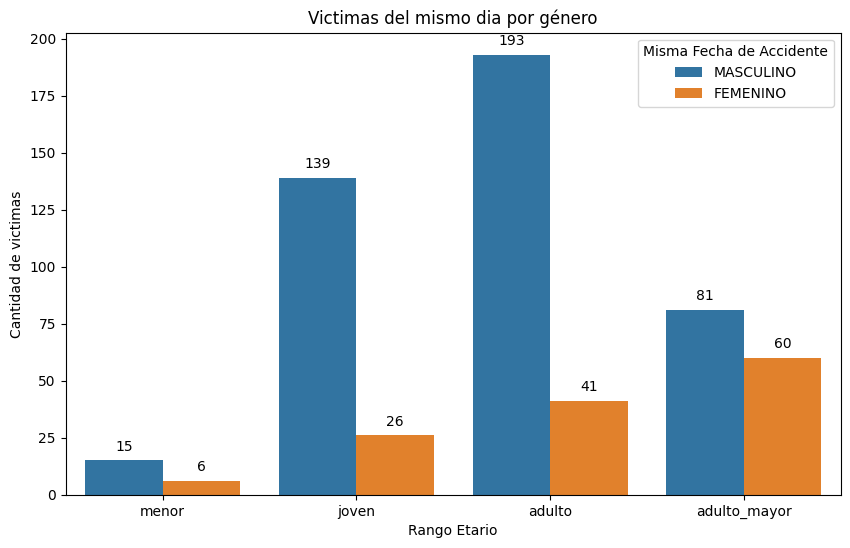

In [216]:

columnas = ['rango_etario', 'misma_fecha_accidente']

mask_misma_fecha =( data['misma_fecha_accidente'] == True) & (data['sexo'] != 'SD' )


plt.figure(figsize=(10, 6))

orden_categorias = ["menor", "joven", "adulto", "adulto_mayor"]
ax = sns.countplot(x='rango_etario', hue='sexo', data=data[mask_misma_fecha], order=orden_categorias )

for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Victimas del mismo dia por género')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de victimas')
plt.legend(title='Misma Fecha de Accidente', loc='upper right')

plt.show()

**Nota** Podemos observar que la mayoria de personas que sufren una accidente, pierden la vida el mismo dia, donde las personas entre 30 y 50 años son los que mayor cantidad de victimas se registran. A continuación analizaremos la evolución de victimas adultos, por otra parte, de las personas que perdieron la vida el mismo dia, las mujeres que tienen no menos de 30 años son las que muestran una mayor siniestralidad. 

**Evolución por año**:  en esta sección analizaremos la evolución de la cantidad de victimas por año

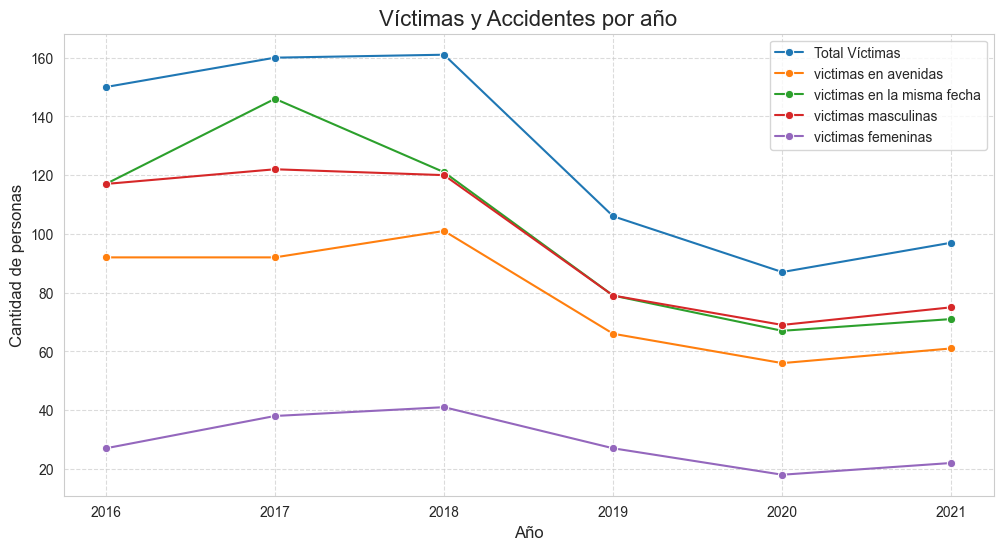

In [229]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid") 

mask_avenida = (data['tipo_de_calle'] =='AVENIDA') & (data['victimas_x'] !='SD')
mask_misma_fecha =( data['misma_fecha_accidente'] == True) & (data['sexo'] != 'SD' )
mask_masculino = data['sexo']=='MASCULINO'
mask_femenino = data['sexo']=='FEMENINO'


sns.lineplot( data[['n_victimas','anho_x']].groupby('anho_x').sum()['n_victimas'], marker='o', label='Total de Víctimas')
sns.lineplot( data[mask_avenida][['n_victimas','anho_x']].groupby('anho_x').sum()['n_victimas'], marker='o', label='victimas en avenidas')
sns.lineplot( data[mask_misma_fecha][['n_victimas','anho_x']].groupby('anho_x').sum()['n_victimas'], marker='o', label='victimas en la misma fecha')
sns.lineplot( data[mask_masculino][['n_victimas','anho_x']].groupby('anho_x').sum()['n_victimas'], marker='o', label='victimas masculinas')
sns.lineplot( data[mask_femenino][['n_victimas','anho_x']].groupby('anho_x').sum()['n_victimas'], marker='o', label='victimas femeninas')




# Personalizar el gráfico
plt.title('Víctimas y Accidentes por año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de personas', fontsize=12)

# Agregar leyenda y cuadrícula
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

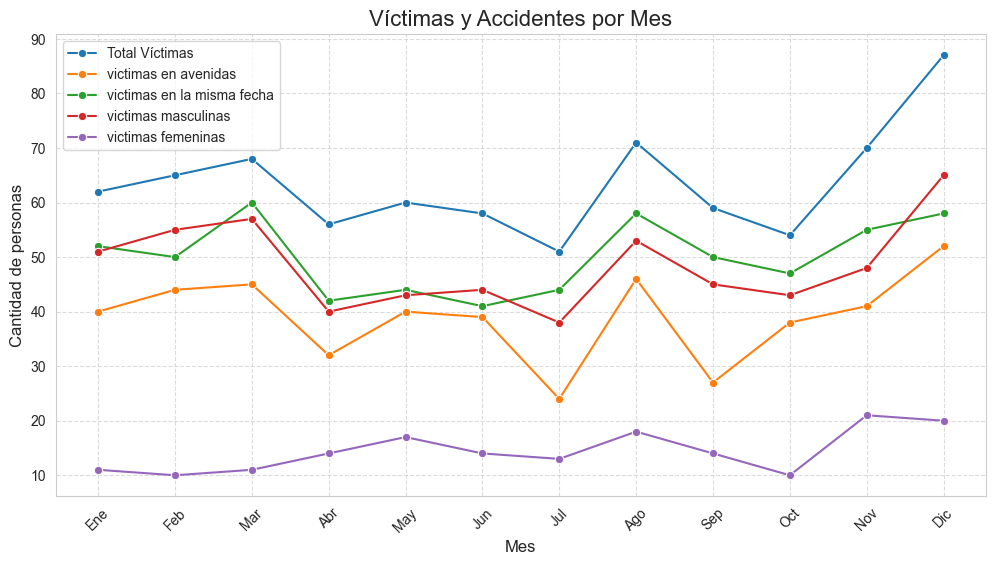

In [227]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid") 

mask_avenida = (data['tipo_de_calle'] =='AVENIDA') & (data['victimas_x'] !='SD')
mask_misma_fecha =( data['misma_fecha_accidente'] == True) & (data['sexo'] != 'SD' )
mask_masculino = data['sexo']=='MASCULINO'
mask_femenino = data['sexo']=='FEMENINO'


sns.lineplot( data[['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='Total Víctimas')
sns.lineplot( data[mask_avenida][['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='victimas en avenidas')
sns.lineplot( data[mask_misma_fecha][['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='victimas en la misma fecha')
sns.lineplot( data[mask_masculino][['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='victimas masculinas')
sns.lineplot( data[mask_femenino][['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='victimas femeninas')




# Personalizar el gráfico
plt.title('Víctimas y Accidentes por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de personas', fontsize=12)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Agregar leyenda y cuadrícula
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

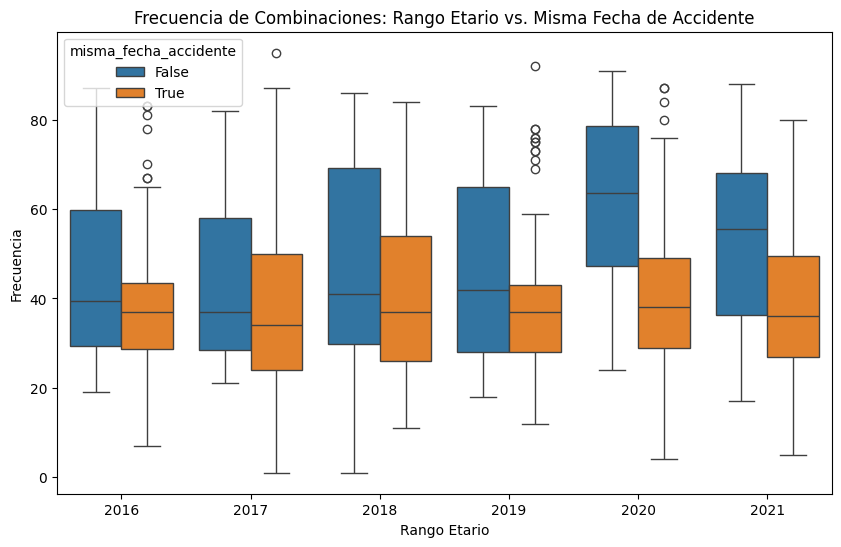

In [205]:

columnas = ['anho_x', 'misma_fecha_accidente']

# Crear el DataFrame con las frecuencias

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# orden_categorias = ["menor", "joven", "adulto", "adulto_mayor"]
ax = sns.boxplot(x='anho_x',y='edad', hue='misma_fecha_accidente', data=data)

# for p in ax.patches:
#     if p.get_height()>0:
#         ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Frecuencia de Combinaciones: Rango Etario vs. Misma Fecha de Accidente')
plt.xlabel('Rango Etario')
plt.ylabel('Frecuencia')

plt.show()

## Cantidad de muesto por

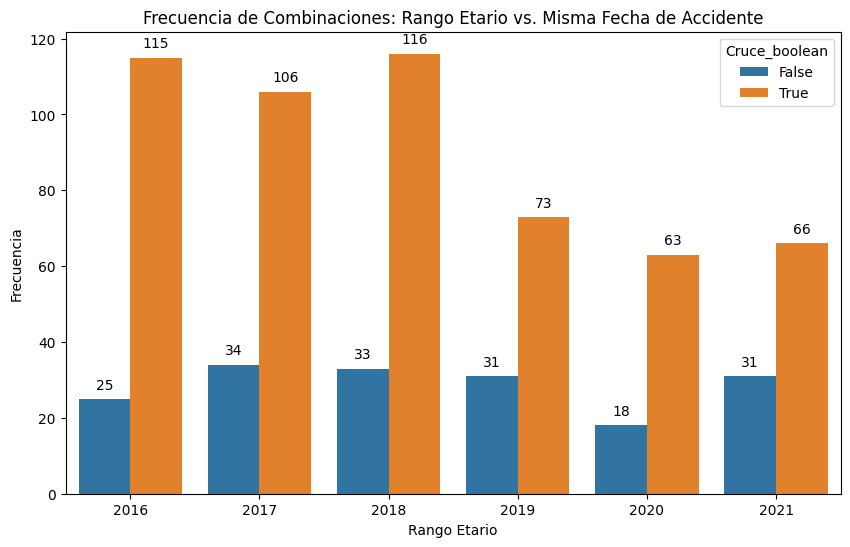

In [103]:
columnas = ['anho_x', 'Cruce_boolean']

# Crear el DataFrame con las frecuencias
mask_sin_SD = data['sexo'] != 'SD'
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# orden_categorias = ["menor", "joven", "adulto", "adulto_mayor"]
ax = sns.countplot(x='anho_x',hue = 'Cruce_boolean', data=data[mask_sin_SD] )

for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Frecuencia de Combinaciones: Rango Etario vs. Misma Fecha de Accidente')
plt.xlabel('Rango Etario')
plt.ylabel('Frecuencia')

plt.show()

## Cantidad de victimas por mes

In [35]:
data[['n_victimas','mes_x']].groupby('mes_x').sum()

,n_victimas
mes_x,
1,62
2,65
3,68
4,56
5,60
6,58
7,51
8,71
9,59


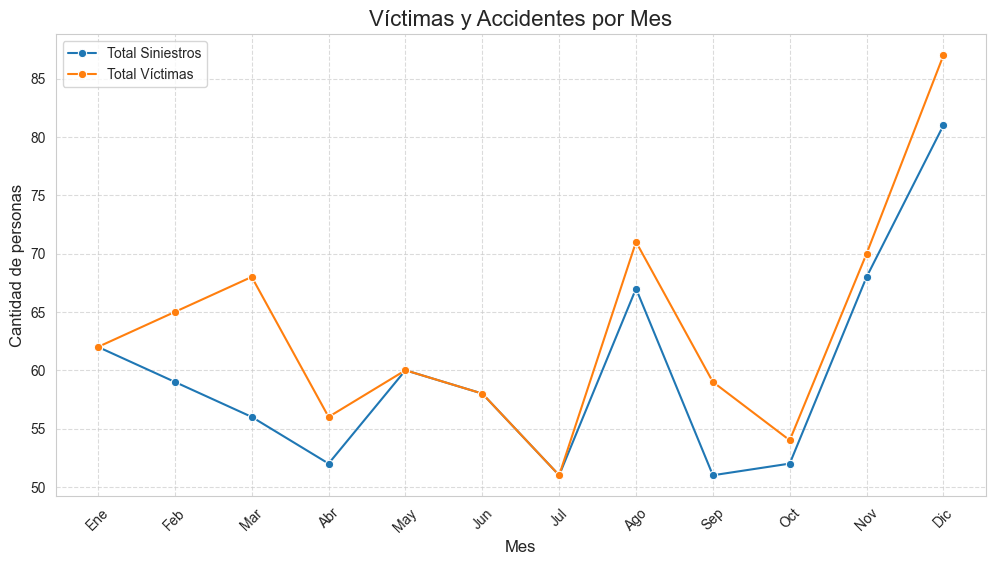

In [50]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid") 


sns.lineplot(data.groupby('mes_x').size() , marker='o', label='Total Siniestros')

sns.lineplot( data[['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='Total Víctimas')

# Personalizar el gráfico
plt.title('Víctimas y Accidentes por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de personas', fontsize=12)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Agregar leyenda y cuadrícula
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


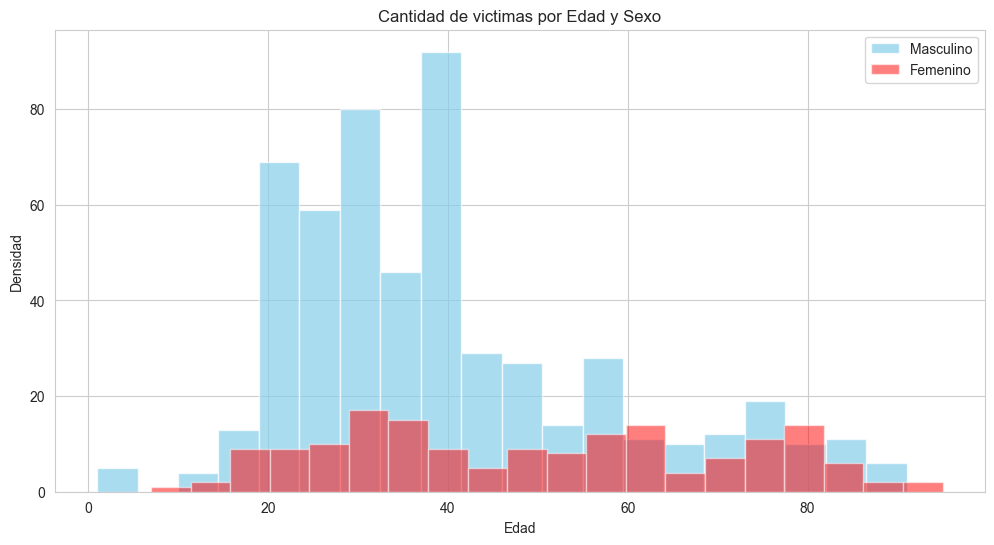

In [70]:
# Crear el histograma
mask_masculino = data['sexo']=='MASCULINO'
mask_femenino = data['sexo']=='FEMENINO'


plt.figure(figsize=(12, 6))
plt.hist(x='edad', data = data[mask_masculino],bins=20, alpha=0.7, color='skyblue', label='Masculino')
plt.hist(x='edad', data = data[mask_femenino],bins=20, alpha=0.5, color='red', label='Femenino')
#plt.hist(femenino, bins=20, alpha=0.5, color='red', label='Femenino', density=True)
plt.title('Cantidad de victimas por Edad y Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

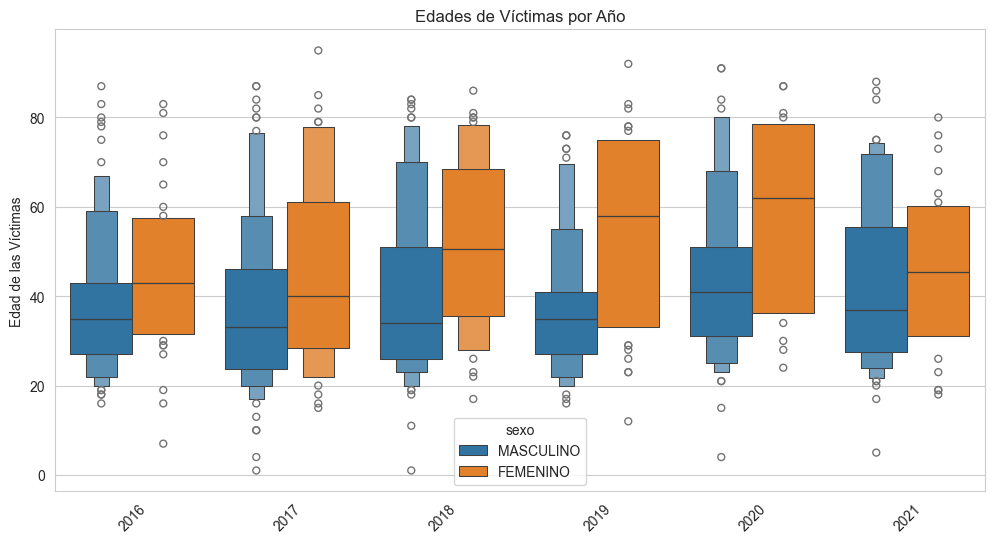

In [82]:
#Se crea el gráfico de boxplot
mask_not_sd = data['sexo']!= 'SD'

plt.figure(figsize=(12, 6))
sns.boxenplot(x='anho_x', y='edad', data=data[mask_not_sd], hue ='sexo')

plt.title('Edades de Víctimas por Año')
plt.xlabel('')
plt.ylabel('Edad de las Víctimas')
# Cambia el formato de las etiquetas del eje x a enteros
plt.xticks(rotation=45)
# Se muestra el gráfico
plt.show()

## Analisis de la población de caba

In [90]:
info_comuna = pd.read_csv('../data/clear/info_comuna.csv',usecols=['COMUNAS','BARRIOS','AREA'])

In [91]:
info_comuna

,COMUNAS,BARRIOS,AREA
0,2,RECOLETA,6.317265e+06
1,6,CABALLITO,6.851029e+06
2,10,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,1.265656e+07
3,11,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL. ...,1.412004e+07
4,12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,1.557093e+07
5,14,PALERMO,1.584587e+07
6,15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERNAL...,1.432290e+07
7,13,BELGRANO - COLEGIALES - NUÑEZ,1.471321e+07
8,4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,2.168464e+07
9,5,ALMAGRO - BOEDO,6.660603e+06


In [93]:
data = data.merge(info_comuna, left_on='comuna', right_on='COMUNAS' )

## Analisis de victimas por barrios y genero

## Densidad de victimas por barrio y genero